## Introduction
In this notebook we will preprocess the data for the cardiac detection task.
We provide bounding boxes for around 500 images of the RSNA pneumonia detection challenge dataset which you have already downloaded in the last section. 

We will again convert the images to npy files for efficient storage and faster data loading.

## Imports

* pathlib for easy path handling
* pydicom for reading dicom files
* numpy for storing the actual images
* cv2 for directly resizing the images
* pandas to read the provided labels
* matplotlib for visualization
* patches from matplotlib to draw bounding boxes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
root = "/content/drive/My Drive/pytorch_udemy/05-Detection/"

In [ ]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 26.3 MB/s 


In [ ]:
from pathlib import Path
import pydicom
import numpy as np
import cv2
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os

At first, we read the csv file containing the labels.

In [ ]:
labels = pd.read_csv(root + "/rsna_heart_detection.csv")

In [ ]:
labels.head()

,label,x0,y0,w,h,name,img_shape_x,img_shape_y
0,heart,91,71,77,102,ca112a3c-b701-48b8-a94f-725ea65416a7,224,224
1,heart,70,64,89,67,e5f292ae-f1e5-497c-b0a0-68f1aa2196b2,224,224
2,heart,82,55,81,76,67af68f7-7ba0-49a0-a373-3a8801eb0faa,224,224
3,heart,93,74,78,89,814289a3-9ce8-4cba-842f-45d6a36f540d,224,224
4,heart,85,61,85,93,e508969f-c931-462b-aa90-ccde34a4d9e5,224,224


In [ ]:
ROOT_PATH = Path("/content/drive/My Drive/pytorch_udemy/04-Pneumonia-Classification/data/stage_2_train_images/")
SAVE_PATH = Path("/content/drive/My Drive/pytorch_udemy/05-Detection/Processed-Heart-Detection/")

Let's visualize some images with corresponding bounding boxes around the heart


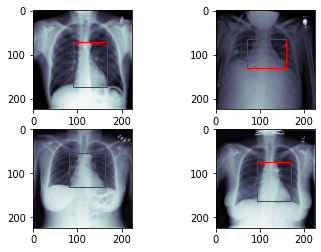

In [ ]:
fig, axis = plt.subplots(2, 2)
c = 0
for i in range(2):
    for j in range(2):
        data = labels.iloc[c]
        patient_id = data["name"]
        dcm_path = ROOT_PATH/str(patient_id)
        dcm_path = dcm_path.with_suffix(".dcm")
        
        dcm = pydicom.read_file(dcm_path)
        dcm_array = dcm.pixel_array
        dcm_array = cv2.resize(dcm_array, (224, 224))
        
        x = data["x0"]
        y = data["y0"]
        width = data["w"]
        height = data["h"]
        
        axis[i][j].imshow(dcm_array, cmap="bone")
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor="r", facecolor='none')
        axis[i][j].add_patch(rect)
        c+=1

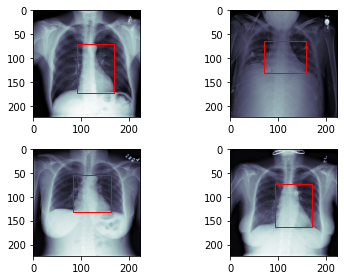

In [ ]:
fig, axis = plt.subplots(2, 2)
c = 0
for i in range(2):
    for j in range(2):
        data = labels.iloc[c]  # Get the c-th row of the labels
        
        patient_id = data["name"]
        dcm_path = ROOT_PATH/str(patient_id)  # Create the path to the dcm file
        dcm_path = dcm_path.with_suffix(".dcm")  # And add the .dcm suffix
        dcm = pydicom.read_file(dcm_path)  # Read the dicom file with pydicom
        
        # Retrieve the actual image and resize it to match the labels
        dcm_array = dcm.pixel_array
        dcm_array = cv2.resize(dcm_array, (224, 224))
        
        x = data["x0"]
        y = data["y0"]
        width = data["w"]
        height = data["h"]
        
        axis[i][j].imshow(dcm_array, cmap="bone")
        rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='r', facecolor='none')
        axis[i][j].add_patch(rect)

        c+=1
plt.tight_layout()

In [ ]:


#Check I have the labelled patient IDs & remove the ones I do not have from the csv



for files in os.listdir(ROOT_PATH):
  filename = os.path.splitext(files)
  for patient in labels.name:
    if files == patient:
      Present.append("True")
    else: 
      Present.append("False")

print(Present)

In [ ]:
present = []
listoffiles  = os.listdir(ROOT_PATH)
patient_id = labels.name 




In [ ]:
for files in listoffiles:
  filename = os.path.splitext(files)[0]
  for name in patient_id:
    if filename == name:
      present.append(name)

In [ ]:
df_names = pd.DataFrame(present, columns =['name'])

In [ ]:
print(df_names)

                                     name
0    f47b9425-6f76-404c-b15b-4efcdbc66a56
1    f4c5713a-67b9-4163-9b2c-ea6337384f17
2    f5ba9b65-ab27-4b62-a451-bd60c45f9203
3    f627cd4f-39f4-4b3f-8729-1dfad8fce3fb
4    f6e78734-eed1-449e-9929-ec8ebd157f3a
..                                    ...
484  01ef1712-90a6-4946-ad86-fc76b0cf2d3b
485  0295573e-1bbe-4f14-83c2-32449fa79f10
486  02bc87cb-6660-4faa-97e4-4de01cb640a4
487  02f6ab3b-7793-4d67-87e3-868911a399b7
488  0422a993-6daa-43b9-aa54-80104541f539

[489 rows x 1 columns]


In [ ]:
print(labels.name)

0      ca112a3c-b701-48b8-a94f-725ea65416a7
1      e5f292ae-f1e5-497c-b0a0-68f1aa2196b2
2      67af68f7-7ba0-49a0-a373-3a8801eb0faa
3      814289a3-9ce8-4cba-842f-45d6a36f540d
4      e508969f-c931-462b-aa90-ccde34a4d9e5
                       ...                 
491    7e413a9c-e331-4188-999c-7cf064cb2417
492    6ab9618a-7d03-432f-8874-8596de1bfe26
493    5f531888-0bcd-44fa-8acb-9f5b71609c38
494    414e4a00-bec4-4552-92d3-7e710b367869
495    d15fd998-0f0f-44cb-850e-ead59d46a231
Name: name, Length: 496, dtype: object


In [ ]:
result = pd.merge(df_names, labels, how="inner", on=['name'])

In [ ]:
print(result)

                                     name  label   x0   y0   w    h  \
0    f47b9425-6f76-404c-b15b-4efcdbc66a56  heart   92   63  71   90   
1    f4c5713a-67b9-4163-9b2c-ea6337384f17  heart   98   51  95  111   
2    f5ba9b65-ab27-4b62-a451-bd60c45f9203  heart   79   65  93  108   
3    f627cd4f-39f4-4b3f-8729-1dfad8fce3fb  heart   85   66  74   97   
4    f6e78734-eed1-449e-9929-ec8ebd157f3a  heart  107   70  84   80   
..                                    ...    ...  ...  ...  ..  ...   
484  01ef1712-90a6-4946-ad86-fc76b0cf2d3b  heart   75   54  87   73   
485  0295573e-1bbe-4f14-83c2-32449fa79f10  heart   96   65  69  101   
486  02bc87cb-6660-4faa-97e4-4de01cb640a4  heart   96  108  78  100   
487  02f6ab3b-7793-4d67-87e3-868911a399b7  heart   85   54  87   88   
488  0422a993-6daa-43b9-aa54-80104541f539  heart   79   64  85   88   

     img_shape_x  img_shape_y  
0            224          224  
1            224          224  
2            224          224  
3            224   

We use a similar preprocessing routine to the one used for the classification task.<br />
To be able to distinguish between train and validation subjects, we store them in two lists and later save these lists.

In [ ]:
sums = 0
sums_squared = 0
train_ids = []
val_ids = []

for counter, patient_id in enumerate(list(result.name)):  
    dcm_path = ROOT_PATH/patient_id  # Create the path to the dcm file
    dcm_path = dcm_path.with_suffix(".dcm")  # And add the .dcm suffix
    
    dcm = pydicom.read_file(dcm_path)  # Read the dicom file with pydicom
    
     # Retrieve the actual image 
    dcm_array = dcm.pixel_array
    assert dcm_array.shape == (1024, 1024)
    
    # Resize the image to drastically improve training speed
    # In order to reduce the space when storing the image we convert it to float16
    # Standardize to 0-1 range
    dcm_array = (cv2.resize(dcm_array, (224, 224)) / 255).astype(np.float16)
            
    # 4/5 train split, 1/5 val split
    train_or_val = "train" if counter < 400 else "val" 
    
    # Add to corresponding train or validation patient index list
    if train_or_val == "train":
        train_ids.append(patient_id)
    else:
        val_ids.append(patient_id)
    
    current_save_path = SAVE_PATH/train_or_val # Define save path and create if necessary
    current_save_path.mkdir(parents=True, exist_ok=True)
    
    np.save(current_save_path/patient_id, dcm_array)  # Save the array in the corresponding directory
    
    normalizer = dcm_array.shape[0] * dcm_array.shape[1]  # Normalize sum of image
    if train_or_val == "train":  # Only use train data to compute dataset statistics
        sums += np.sum(dcm_array) / normalizer
        sums_squared += (np.power(dcm_array, 2).sum()) / normalizer


In [ ]:
sums

196.05341198979588

Finally we store the train and val subject ids

In [ ]:
np.save("/content/drive/My Drive/pytorch_udemy/05-Detection/Processed-Heart-Detection/train_subjects_det", train_ids)
np.save("/content/drive/My Drive/pytorch_udemy/05-Detection/Processed-Heart-Detection/val_subjects_det", val_ids)

In [ ]:
mean = sums / len(train_ids)
std = np.sqrt(sums_squared / len(train_ids) - (mean**2), dtype=np.float64)

In [ ]:
print(f"Mean of Dataset: {mean}, STD: {std}")

Mean of Dataset: 0.49013352997448967, STD: 0.25374921086908814


In [ ]:
result.to_csv(root + "/rsna_heart_detection_2.csv", index=False)